# **Stuart Movie Data Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
movie_data = pd.read_csv('movie_data.csv')
movie_data

,movie,genres,main_genre,subgenres,budget,release_month,release_year,production_budget,domestic_gross,foreign_gross,worldwide_gross,total_profit,total_profit_margin,director,birth_year,death_year
0,Trouble with the Curve,"Drama,Sport",Drama,['Sport'],high,9,2012,60000000,35763137,12055776,47818913,-12181087,-25.47,Robert Lorenz,NaN,NaN
1,The Sisterhood of Night,"Drama,Mystery,Thriller",Drama,"['Mystery', 'Thriller']",low,4,2015,1000000,6870,0,6870,-993130,-14456.04,Caryn Waechter,NaN,NaN
2,For Greater Glory: The True Story of Cristiada,"Drama,History,War",Drama,"['History', 'War']",mid,6,2012,12000000,5669081,4357174,10026255,-1973745,-19.69,Dean Wright,NaN,NaN
3,Detention of the Dead,"Action,Adventure,Comedy",Action,"['Adventure', 'Comedy']",low,6,2013,500000,1778,0,1778,-498222,-28021.48,Alex Craig Mann,NaN,NaN
4,3 Backyards,Drama,Drama,[],low,3,2011,300000,39475,0,39475,-260525,-659.97,Eric Mendelsohn,1964.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Tinker Tailor Soldier Spy,"Drama,Mystery,Thriller",Drama,"['Mystery', 'Thriller']",mid,12,2011,21000000,24149393,57303418,81452811,60452811,74.22,Tomas Alfredson,1965.0,NaN
1569,The Snowman,"Crime,Drama,Mystery",Crime,"['Drama', 'Mystery']",mid,10,2017,35000000,6670765,36555381,43226146,8226146,19.03,Tomas Alfredson,1965.0,NaN
1570,Lawless,"Action,Adventure,Documentary",Action,"['Adventure', 'Documentary']",mid,8,2012,26000000,37397291,16996396,54393687,28393687,52.20,Mario Mandujano,NaN,NaN
1571,Fort McCoy,"Drama,History,War",Drama,"['History', 'War']",low,8,2014,3000000,78948,0,78948,-2921052,-3699.97,Michael Worth,1965.0,NaN


In [3]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie                1573 non-null   object 
 1   genres               1573 non-null   object 
 2   main_genre           1573 non-null   object 
 3   subgenres            1573 non-null   object 
 4   budget               1573 non-null   object 
 5   release_month        1573 non-null   int64  
 6   release_year         1573 non-null   int64  
 7   production_budget    1573 non-null   int64  
 8   domestic_gross       1573 non-null   int64  
 9   foreign_gross        1573 non-null   int64  
 10  worldwide_gross      1573 non-null   int64  
 11  total_profit         1573 non-null   int64  
 12  total_profit_margin  1573 non-null   float64
 13  director             1573 non-null   object 
 14  birth_year           1057 non-null   float64
 15  death_year           11 non-null     f

In [4]:
movie_data.describe()

,release_month,release_year,production_budget,domestic_gross,foreign_gross,worldwide_gross,total_profit,total_profit_margin,birth_year,death_year
count,1573.000000,1573.00000,1.573000e+03,1.573000e+03,1.573000e+03,1.573000e+03,1.573000e+03,1.573000e+03,1057.000000,11.000000
mean,6.767959,2013.91227,4.321485e+07,5.390563e+07,8.151861e+07,1.354242e+08,9.220938e+07,-4.883562e+03,1965.251656,2013.545455
std,3.427763,2.55896,5.504788e+07,8.318822e+07,1.526937e+08,2.288671e+08,1.887044e+08,1.005074e+05,10.607542,2.207425
min,1.000000,2010.00000,2.500000e+04,0.000000e+00,0.000000e+00,2.600000e+01,-2.002376e+08,-3.846054e+06,1930.000000,2010.000000
25%,4.000000,2012.00000,8.000000e+06,2.981038e+06,1.948503e+06,7.712436e+06,-9.931300e+05,-2.778000e+01,1960.000000,2012.000000
50%,7.000000,2014.00000,2.200000e+07,2.537998e+07,1.953124e+07,4.750850e+07,2.107854e+07,5.243000e+01,1966.000000,2013.000000
75%,10.000000,2016.00000,5.020000e+07,6.457518e+07,8.080000e+07,1.498046e+08,9.830063e+07,7.516000e+01,1973.000000,2015.000000
max,12.000000,2019.00000,4.106000e+08,7.000596e+08,1.369319e+09,2.048134e+09,1.748134e+09,9.976000e+01,1996.000000,2017.000000


In [5]:
high_budget = movie_data[movie_data['budget'].str.contains('high')]
mid_budget = movie_data[movie_data['budget'].str.contains('mid')]
low_budget = movie_data[movie_data['budget'].str.contains('low')]

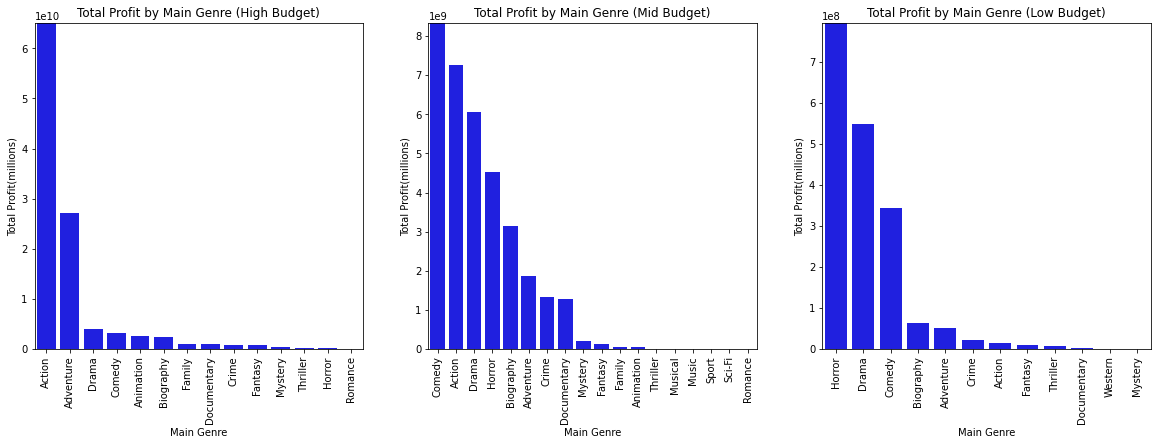

In [6]:
# group movie_data by main_genre and calculate the total profit for each genre
genre_profit_high = high_budget.groupby('main_genre')['total_profit'].sum().reset_index()
genre_profit_mid = mid_budget.groupby('main_genre')['total_profit'].sum().reset_index()
genre_profit_low = low_budget.groupby('main_genre')['total_profit'].sum().reset_index()

# sort the dataframes by total_profit in descending order
genre_profit_high = genre_profit_high.sort_values(by='total_profit', ascending=False)
genre_profit_mid = genre_profit_mid.sort_values(by='total_profit', ascending=False)
genre_profit_low = genre_profit_low.sort_values(by='total_profit', ascending=False)

# create a matrix plot
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# plot the bar charts
sns.barplot(x='main_genre', y='total_profit', data=genre_profit_high, order=genre_profit_high['main_genre'], color='b', ax=axs[0])
sns.barplot(x='main_genre', y='total_profit', data=genre_profit_mid, order=genre_profit_mid['main_genre'], color='b', ax=axs[1])
sns.barplot(x='main_genre', y='total_profit', data=genre_profit_low, order=genre_profit_low['main_genre'], color='b', ax=axs[2])

# set titles and labels
axs[0].set_title('Total Profit by Main Genre (High Budget)')
axs[1].set_title('Total Profit by Main Genre (Mid Budget)')
axs[2].set_title('Total Profit by Main Genre (Low Budget)')
axs[0].set_xlabel('Main Genre')
axs[1].set_xlabel('Main Genre')
axs[2].set_xlabel('Main Genre')
axs[0].set_ylabel('Total Profit(millions)')
axs[1].set_ylabel('Total Profit(millions)')
axs[2].set_ylabel('Total Profit(millions)')
axs[0].tick_params(axis='x', labelrotation=90)
axs[1].tick_params(axis='x', labelrotation=90)
axs[2].tick_params(axis='x', labelrotation=90)
axs[0].set_ylim([0, max(genre_profit_high['total_profit'])])
axs[1].set_ylim([0, max(genre_profit_mid['total_profit'])])
axs[2].set_ylim([0, max(genre_profit_low['total_profit'])])

plt.show()

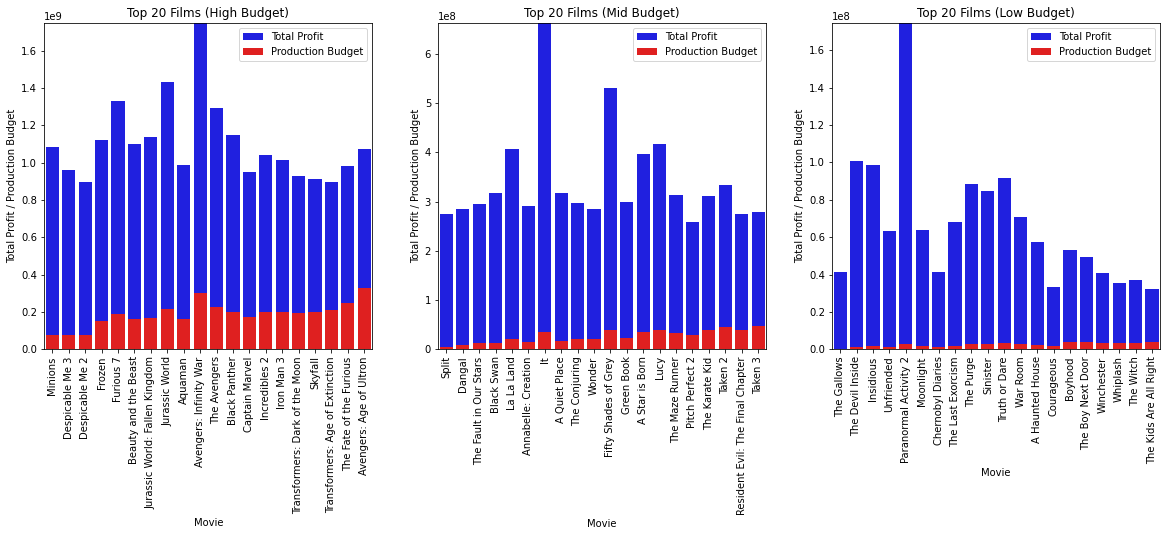

In [7]:
# sort the movie_data dataframe by budget in descending order and select the top 20 for each budget category
high_budget_top20 = movie_data[movie_data['budget'] == 'high'].sort_values(by='total_profit', ascending=False).head(20)
mid_budget_top20 = movie_data[movie_data['budget'] == 'mid'].sort_values(by='total_profit', ascending=False).head(20)
low_budget_top20 = movie_data[movie_data['budget'] == 'low'].sort_values(by='total_profit', ascending=False).head(20)

# sort the movie_data dataframe by total_profit_margin in descending order and select the top 20 for each budget category
high_budget_top20 = high_budget_top20.sort_values(by='total_profit_margin', ascending=False)
mid_budget_top20 = mid_budget_top20.sort_values(by='total_profit_margin', ascending=False)
low_budget_top20 = low_budget_top20.sort_values(by='total_profit_margin', ascending=False)

# create a matrix plot
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# plot the bar charts
sns.barplot(x='movie', y='total_profit', data=high_budget_top20, color='b', ax=axs[0], label='Total Profit')
sns.barplot(x='movie', y='production_budget', data=high_budget_top20, color='r', ax=axs[0], label='Production Budget')
sns.barplot(x='movie', y='total_profit', data=mid_budget_top20, color='b', ax=axs[1], label='Total Profit')
sns.barplot(x='movie', y='production_budget', data=mid_budget_top20, color='r', ax=axs[1], label='Production Budget')
sns.barplot(x='movie', y='total_profit', data=low_budget_top20, color='b', ax=axs[2], label='Total Profit')
sns.barplot(x='movie', y='production_budget', data=low_budget_top20, color='r', ax=axs[2], label='Production Budget')

# set titles and labels
axs[0].set_title('Top 20 Films (High Budget)')
axs[1].set_title('Top 20 Films (Mid Budget)')
axs[2].set_title('Top 20 Films (Low Budget)')
axs[0].set_xlabel('Movie')
axs[1].set_xlabel('Movie')
axs[2].set_xlabel('Movie')
axs[0].set_ylabel('Total Profit / Production Budget')
axs[1].set_ylabel('Total Profit / Production Budget')
axs[2].set_ylabel('Total Profit / Production Budget')
axs[0].tick_params(axis='x', labelrotation=90)
axs[1].tick_params(axis='x', labelrotation=90)
axs[2].tick_params(axis='x', labelrotation=90)
axs[0].set_ylim([0, max(high_budget_top20['total_profit'])])
axs[1].set_ylim([0, max(mid_budget_top20['total_profit'])])
axs[2].set_ylim([0, max(low_budget_top20['total_profit'])])
axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.show()

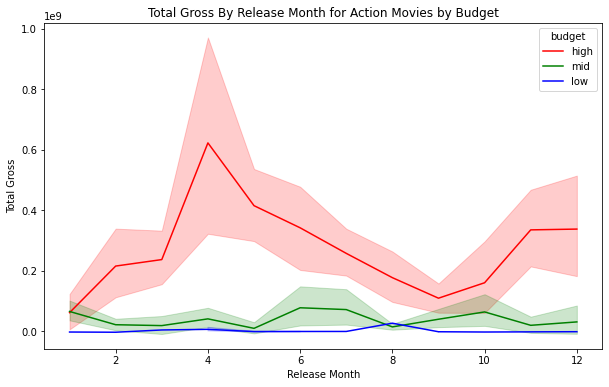

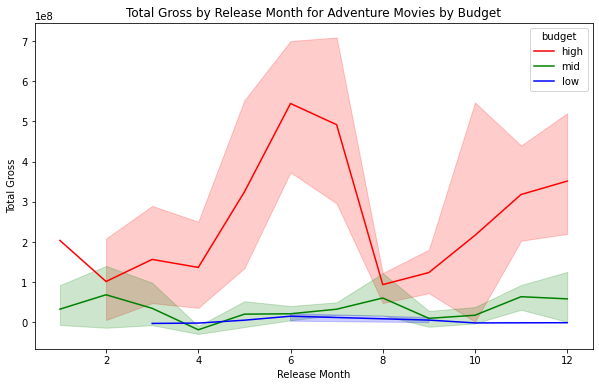

In [8]:
# create a new dataframe with total gross and year from high, mid, and low budget df where genre is action
action_movies = movie_data[movie_data['main_genre'] == 'Action']
high_budget_action = action_movies[action_movies['budget'] == 'high']
mid_budget_action = action_movies[action_movies['budget'] == 'mid']
low_budget_action = action_movies[action_movies['budget'] == 'low']

# create a new dataframe with total gross and month from high, mid, and low budget action movies
high_budget_total_gross_month = high_budget_action[['total_profit', 'release_month', 'budget']].copy()
mid_budget_total_gross_month = mid_budget_action[['total_profit', 'release_month', 'budget']].copy()
low_budget_total_gross_month = low_budget_action[['total_profit', 'release_month', 'budget']].copy()

# plot distribution plot of total gross by month for high, mid, and low budget action movies
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=high_budget_total_gross_month, x='release_month', y='total_profit', hue='budget', ax=ax, palette=['red'])
sns.lineplot(data=mid_budget_total_gross_month, x='release_month', y='total_profit', hue='budget', ax=ax, palette=['green'])
sns.lineplot(data=low_budget_total_gross_month, x='release_month', y='total_profit', hue='budget', ax=ax, palette=['blue'])
ax.set(title='Total Gross By Release Month for Action Movies by Budget', xlabel='Release Month', ylabel='Total Gross')
plt.show()

# create a new dataframe with total gross and year from high, mid, and low budget df where genre is adventure
adventure_movies = movie_data[movie_data['main_genre'] == 'Adventure']
high_budget_adventure = adventure_movies[adventure_movies['budget'] == 'high']
mid_budget_adventure = adventure_movies[adventure_movies['budget'] == 'mid']
low_budget_adventure = adventure_movies[adventure_movies['budget'] == 'low']

# create a new dataframe with total gross and month from high, mid, and low budget adventure movies
high_budget_total_gross_month = high_budget_adventure[['total_profit', 'release_month', 'budget']].copy()
mid_budget_total_gross_month = mid_budget_adventure[['total_profit', 'release_month', 'budget']].copy()
low_budget_total_gross_month = low_budget_adventure[['total_profit', 'release_month', 'budget']].copy()

# plot distribution plot of total gross by month for high, mid, and low budget adventure movies
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=high_budget_total_gross_month, x='release_month', y='total_profit', hue='budget', ax=ax, palette=['red'])
sns.lineplot(data=mid_budget_total_gross_month, x='release_month', y='total_profit', hue='budget', ax=ax, palette=['green'])
sns.lineplot(data=low_budget_total_gross_month, x='release_month', y='total_profit', hue='budget', ax=ax, palette=['blue'])
ax.set(title='Total Gross by Release Month for Adventure Movies by Budget', xlabel='Release Month', ylabel='Total Gross')
plt.show()

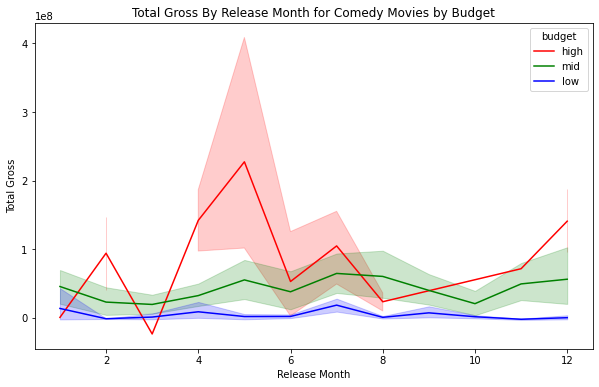

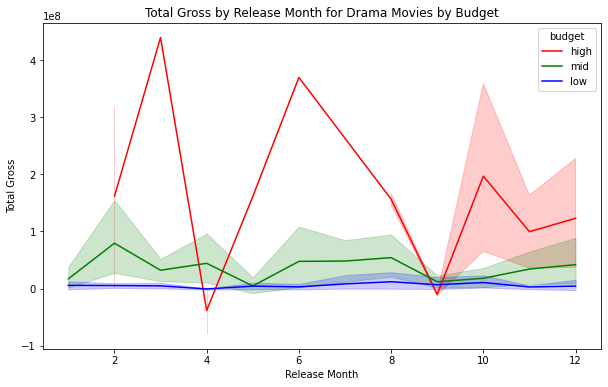

In [9]:
# create a new dataframe with total gross and year from high, mid, and low budget df where genre is comedy
comedy_movies = movie_data[movie_data['main_genre'] == 'Comedy']
high_budget_comedy = comedy_movies[comedy_movies['budget'] == 'high']
mid_budget_comedy = comedy_movies[comedy_movies['budget'] == 'mid']
low_budget_comedy = comedy_movies[comedy_movies['budget'] == 'low']

# create a new dataframe with total gross and month from high, mid, and low budget comedy movies
high_budget_total_gross_month = high_budget_comedy[['total_profit', 'release_month', 'budget']].copy()
mid_budget_total_gross_month = mid_budget_comedy[['total_profit', 'release_month', 'budget']].copy()
low_budget_total_gross_month = low_budget_comedy[['total_profit', 'release_month', 'budget']].copy()

# plot distribution plot of total gross by month for high, mid, and low budget comedy movies
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=high_budget_total_gross_month, x='release_month', y='total_profit', hue='budget', ax=ax, palette=['red'])
sns.lineplot(data=mid_budget_total_gross_month, x='release_month', y='total_profit', hue='budget', ax=ax, palette=['green'])
sns.lineplot(data=low_budget_total_gross_month, x='release_month', y='total_profit', hue='budget', ax=ax, palette=['blue'])
ax.set(title='Total Gross By Release Month for Comedy Movies by Budget', xlabel='Release Month', ylabel='Total Gross')
plt.show()

# create a new dataframe with total gross and year from high, mid, and low budget df where genre is drama
drama_movies = movie_data[movie_data['main_genre'] == 'Drama']
high_budget_drama = drama_movies[drama_movies['budget'] == 'high']
mid_budget_drama = drama_movies[drama_movies['budget'] == 'mid']
low_budget_drama = drama_movies[drama_movies['budget'] == 'low']

# create a new dataframe with total gross and month from high, mid, and low budget drama movies
high_budget_total_gross_month = high_budget_drama[['total_profit', 'release_month', 'budget']].copy()
mid_budget_total_gross_month = mid_budget_drama[['total_profit', 'release_month', 'budget']].copy()
low_budget_total_gross_month = low_budget_drama[['total_profit', 'release_month', 'budget']].copy()

# plot distribution plot of total gross by month for high, mid, and low budget drama movies
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=high_budget_total_gross_month, x='release_month', y='total_profit', hue='budget', ax=ax, palette=['red'])
sns.lineplot(data=mid_budget_total_gross_month, x='release_month', y='total_profit', hue='budget', ax=ax, palette=['green'])
sns.lineplot(data=low_budget_total_gross_month, x='release_month', y='total_profit', hue='budget', ax=ax, palette=['blue'])
ax.set(title='Total Gross by Release Month for Drama Movies by Budget', xlabel='Release Month', ylabel='Total Gross')
plt.show()

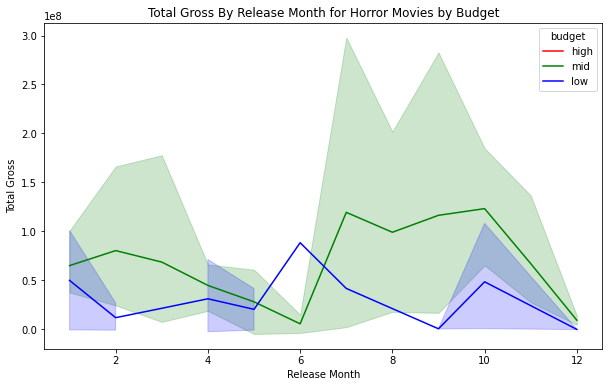

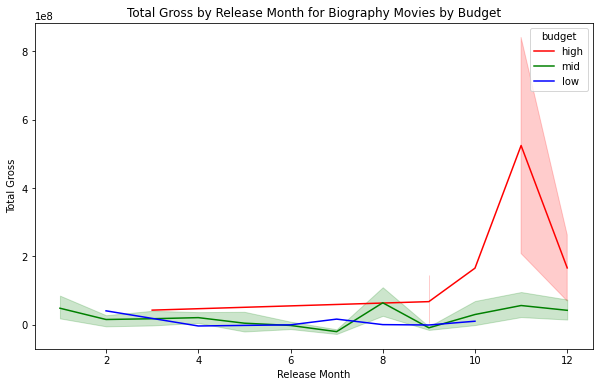

In [10]:
# create a new dataframe with total gross and year from high, mid, and low budget df where genre is horror
horror_movies = movie_data[movie_data['main_genre'] == 'Horror']
high_budget_horror = horror_movies[horror_movies['budget'] == 'high']
mid_budget_horror = horror_movies[horror_movies['budget'] == 'mid']
low_budget_horror = horror_movies[horror_movies['budget'] == 'low']

# create a new dataframe with total gross and month from high, mid, and low budget horror movies
high_budget_total_gross_month = high_budget_horror[['total_profit', 'release_month', 'budget']].copy()
mid_budget_total_gross_month = mid_budget_horror[['total_profit', 'release_month', 'budget']].copy()
low_budget_total_gross_month = low_budget_horror[['total_profit', 'release_month', 'budget']].copy()

# plot distribution plot of total gross by month for high, mid, and low budget horror movies
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=high_budget_total_gross_month, x='release_month', y='total_profit', hue='budget', ax=ax, palette=['red'])
sns.lineplot(data=mid_budget_total_gross_month, x='release_month', y='total_profit', hue='budget', ax=ax, palette=['green'])
sns.lineplot(data=low_budget_total_gross_month, x='release_month', y='total_profit', hue='budget', ax=ax, palette=['blue'])
ax.set(title='Total Gross By Release Month for Horror Movies by Budget', xlabel='Release Month', ylabel='Total Gross')
plt.show()

# create a new dataframe with total gross and year from high, mid, and low budget df where genre is biography
biography_movies = movie_data[movie_data['main_genre'] == 'Biography']
high_budget_biography = biography_movies[biography_movies['budget'] == 'high']
mid_budget_biography = biography_movies[biography_movies['budget'] == 'mid']
low_budget_biography = biography_movies[biography_movies['budget'] == 'low']

# create a new dataframe with total gross and month from high, mid, and low budget biography movies
high_budget_total_gross_month = high_budget_biography[['total_profit', 'release_month', 'budget']].copy()
mid_budget_total_gross_month = mid_budget_biography[['total_profit', 'release_month', 'budget']].copy()
low_budget_total_gross_month = low_budget_biography[['total_profit', 'release_month', 'budget']].copy()

# plot distribution plot of total gross by month for high, mid, and low budget biography movies
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=high_budget_total_gross_month, x='release_month', y='total_profit', hue='budget', ax=ax, palette=['red'])
sns.lineplot(data=mid_budget_total_gross_month, x='release_month', y='total_profit', hue='budget', ax=ax, palette=['green'])
sns.lineplot(data=low_budget_total_gross_month, x='release_month', y='total_profit', hue='budget', ax=ax, palette=['blue'])
ax.set(title='Total Gross by Release Month for Biography Movies by Budget', xlabel='Release Month', ylabel='Total Gross')
plt.show()

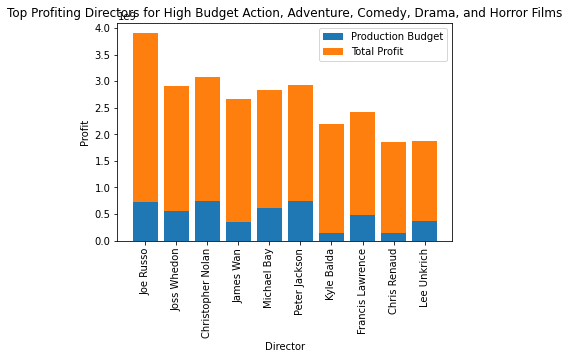

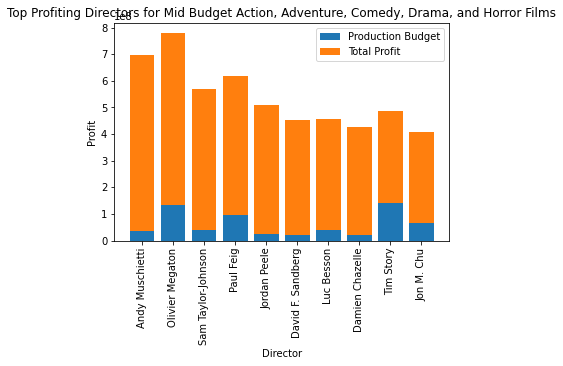

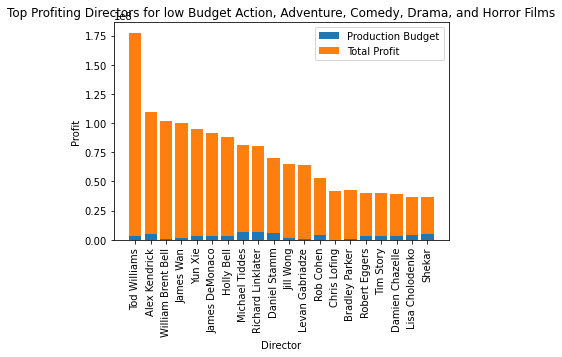

In [16]:
# filter the high budget dataframe for the specified genres
genres = ["Action", "Adventure", "Comedy", "Drama", "Horror"]
high_budget_filtered = high_budget[high_budget["main_genre"].isin(genres)]

# group the dataframe by director and calculate the mean profit margin and sum production budget for each director
director_profit_margin = high_budget_filtered.groupby("director").agg({"total_profit": "sum", "production_budget": "sum"})

# sort the directors by profit margin in descending order and select the top 10
top_directors = director_profit_margin.sort_values(by="total_profit", ascending=False)[:10]

# plot the top directors and their profit margins and production budgets
fig, ax = plt.subplots()
ax.bar(top_directors.index, top_directors["production_budget"], label="Production Budget")
ax.bar(top_directors.index, top_directors["total_profit"], label="Total Profit", bottom=top_directors["production_budget"])
ax.set_xticklabels(top_directors.index, rotation=90)
ax.set_xlabel("Director")
ax.set_ylabel("Profit")
ax.set_title("Top Profiting Directors for High Budget Action, Adventure, Comedy, Drama, and Horror Films")
ax.legend()
plt.show()

# filter the high budget dataframe for the specified genres
genres = ["Action", "Adventure", "Comedy", "Drama", "Horror"]
mid_budget_filtered = mid_budget[mid_budget["main_genre"].isin(genres)]

# group the dataframe by director and calculate the mean profit margin and sum production budget for each director
director_profit_margin = mid_budget_filtered.groupby("director").agg({"total_profit": "sum", "production_budget": "sum"})

# sort the directors by profit margin in descending order and select the top 10
top_directors = director_profit_margin.sort_values(by="total_profit", ascending=False)[:10]

# plot the top directors and their profit margins and production budgets
fig, ax = plt.subplots()
ax.bar(top_directors.index, top_directors["production_budget"], label="Production Budget")
ax.bar(top_directors.index, top_directors["total_profit"], label="Total Profit", bottom=top_directors["production_budget"])
ax.set_xticklabels(top_directors.index, rotation=90)
ax.set_xlabel("Director")
ax.set_ylabel("Profit")
ax.set_title("Top Profiting Directors for Mid Budget Action, Adventure, Comedy, Drama, and Horror Films")
ax.legend()
plt.show()

# filter the high budget dataframe for the specified genres
genres = ["Action", "Adventure", "Comedy", "Drama", "Horror"]
low_budget_filtered = low_budget[low_budget["main_genre"].isin(genres)]

# group the dataframe by director and calculate the mean profit margin and sum production budget for each director
director_profit_margin = low_budget_filtered.groupby("director").agg({"total_profit": "sum", "production_budget": "sum"})

# sort the directors by profit margin in descending order and select the top 10
top_directors = director_profit_margin.sort_values(by="total_profit", ascending=False)[:20]

# plot the top directors and their profit margins and production budgets
fig, ax = plt.subplots()
ax.bar(top_directors.index, top_directors["production_budget"], label="Production Budget")
ax.bar(top_directors.index, top_directors["total_profit"], label="Total Profit", bottom=top_directors["production_budget"])
ax.set_xticklabels(top_directors.index, rotation=90)
ax.set_xlabel("Director")
ax.set_ylabel("Profit")
ax.set_title("Top Profiting Directors for low Budget Action, Adventure, Comedy, Drama, and Horror Films")
ax.legend()
plt.show()

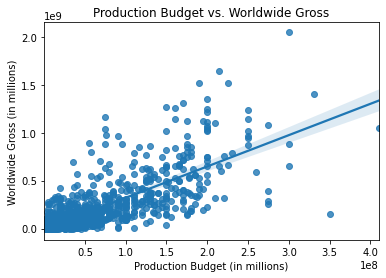

R-squared value: 0.6175447178158606


In [21]:
# select the columns for the linear regression model
X = movie_data["production_budget"].values.reshape(-1, 1)
y = movie_data["worldwide_gross"].values.reshape(-1, 1)

# create the linear regression model
model = LinearRegression()
model.fit(X, y)

# plot the data and the regression line
sns.regplot(x=X.reshape(-1), y=y.reshape(-1))
plt.xlabel("Production Budget (in millions)")
plt.ylabel("Worldwide Gross (in millions)")
plt.title("Production Budget vs. Worldwide Gross")
plt.show()

# analyze the model
r_squared = model.score(X, y)
print("R-squared value:", r_squared)

In [26]:
# fit a linear regression model to the data
X = sm.add_constant(movie_data["production_budget"])
y = movie_data["worldwide_gross"]
model = sm.OLS(y, X).fit()

# print the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     2537.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:21:59   Log-Likelihood:                -31754.
No. Observations:                1573   AIC:                         6.351e+04
Df Residuals:                    1571   BIC:                         6.352e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5.768e+06   4.54e+06     -1.271      0.204   -1.47e+07    3.14e+06
production_budget     3.2672      0.065     50.365      0.000       3.140       3.394
==============================================================================
Omnibus:                      766.465   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12633.827
Skew:                           1.862   Prob(JB):                         0.00
Kurtosis:                      16.375   Cond. No.                     8.90e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.9e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
#predict the worldwide gross for a production budget of $50 million
budget = [[50_000_000]]
predicted_gross = model.predict(budget)
print("Predicted worldwide gross for $50 million budget:", predicted_gross[0][0])

# calculate the mean squared error of the model
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("Mean squared error:", mse)

Predicted worldwide gross for $50 million budget: 157592738.04441476
Mean squared error: 2.002032701575883e+16
